Install relevant libraries required for the OCR task using Tesseract.

In [1]:
# pip install opencv-python
# pip install pytesseract
# pip install matplotlib
# !pip install fastwer
# !pip install pybind11
# pip install Image
# pip install Pillow
# pip install langdetect

Import all the necessary libraries for the task.

In [2]:
import re
import cv2 
import fastwer
import os
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
%matplotlib inline
import time

Performing OCR using tesseract requires preprocessing the image for better output.
We start by writing different methods required for preprocessing the image.

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Let's start by importing and plotting the original image for our task.

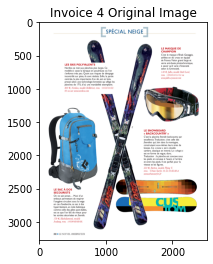

In [4]:
# Function Plot original image
# def plot_org_image(image_name):

start = time.time()

image = cv2.imread('/Users/harshit/Desktop/Major_Project/DataSet/Advert/advert_image_4.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('Invoice 4 Original Image')
plt.show()


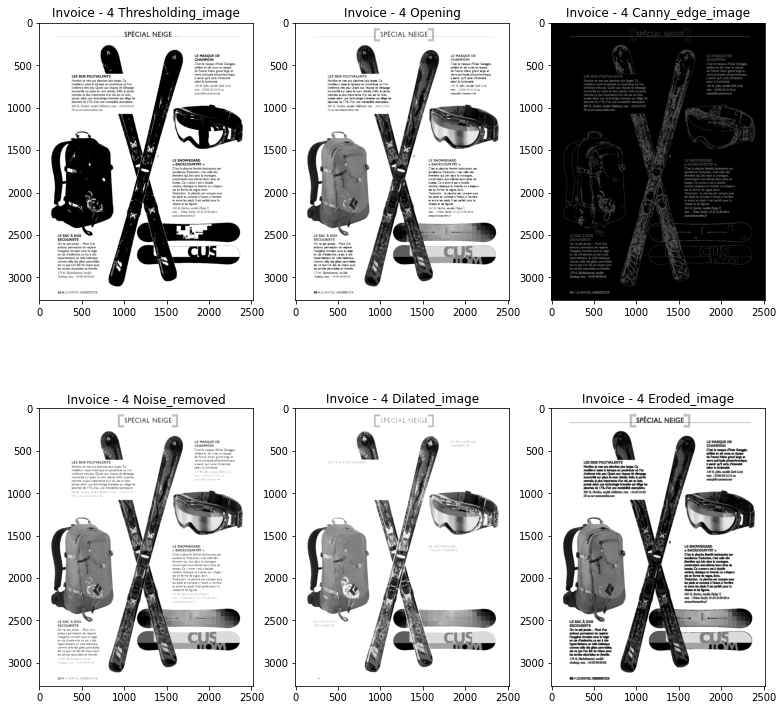

In [5]:
# Preprocess and Plot images after preprocessing

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
remove_noise = remove_noise(gray)
dilate = dilate(gray)
erode = erode(gray)
deskew = deskew(gray)
images = {
#         'gray': gray, 
          'Thresholding_image': thresh, 
          'Opening': opening, 
          'Canny_edge_image': canny,
         'Noise_removed': remove_noise,
         'Dilated_image': dilate,
          'Eroded_image': erode
#           'deskew': deskew
         }

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 3
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('Invoice - 4 ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')


In [6]:
# Get OCR output using Pytesseract

custom_config = r'-l fra+eng --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> INVOICE IMAGE 1')
print('-----------------------------------------')
org_image = pytesseract.image_to_string(gray)
print(org_image)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
thresh_image = pytesseract.image_to_string(thresh)
print(thresh_image)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
opened_image = pytesseract.image_to_string(opening)
print(opened_image)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
canny_edge_image = pytesseract.image_to_string(canny)
print(canny_edge_image)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> NOISE REMOVED IMAGE')
print('-----------------------------------------')
nosie_removed_image = pytesseract.image_to_string(remove_noise)
print(nosie_removed_image)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> DILATE IMAGE')
print('-----------------------------------------')
dilate_image = pytesseract.image_to_string(dilate)
print(dilate_image)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> ERODE IMAGE')
print('-----------------------------------------')
erode_image = pytesseract.image_to_string(erode)
print(erode_image)

end = time.time()


-----------------------------------------
TESSERACT OUTPUT --> INVOICE IMAGE 1
-----------------------------------------
SPECIAL NEIGE

 
  
 
 
 
   
   
  
  
 
 
  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

LE MASQUE DE
CHAMPION

Cest le masque d’Enak Gavaggio,
athléte en ski cross en équipe
de France. Vision grand large et
verre anti-buée photochromique,
a savoir qu’il varie d’intensité
selon la luminosité.

140 €, Julbo, modéle Dark Lord,
rens, : 03-84-34-14-14 ou
wwwjulbo-eyewearcom

  

LES SKIS POLYVALENTS
Nordica se met aux planches plus larges. Ce
modéle-ci casse la baraque en poudreuse ot l'on
s’enfonce trés peu. Quant aux risques de dérapage
incontrélé sur piste, ils sont réduits. Enfin, la partie
centrale, la plus importante d’un ski, est en bois,
pressé selon une technologie brevetée qui allége les
planches de 17%, d’ot! une maniabilité exemplaire.

800 €, Nordica, modeéle Helldriver, rens. : 04-50-10-32-
00 ou sur wwwnordica.com

LE SNOWBOARD

« BACKCOUNTRY »

Crest la planche fr

SPECIAL NEIGE

    

LE MASQUE DE
CHAMPION

 

LES SKIS POLYVALENTS

LE SNOWBOARD
BACKCOUNTRY

LE SAC A DOS
SECOURISTE


-----------------------------------------
TESSERACT OUTPUT --> ERODE IMAGE
-----------------------------------------
 

   
  
     
   
 
 

LE MASQUE DE
CHAMPION

 

incontrélé sur piste, lls sont réduits. Enfin, la partie
centrale, plus importante fun ski, est en bets

pressé selon une technologie brevetée qui allége les
planches de 17%, d’od une maniabilité ecemplaire.

800 € Nondica, modéle Helldriver, rens. : 04-50-10-32-
00 ou sur wenanordica.com

 

car lor piece Het perk peur
vitesse et les figures.

550 € Burion, modéle Flying V,
rens. : Urban Surfer, 01-53-10-85-88 et

   

est ce que Fon fait de mieux pour
les sorties sécurisées en freeride.
179 € Blackdiamond, modéle
Avalung, rens. : 04-90-68-68-68.

  

202 © LE NOUVEL OBSER\ATEUR



Open the text file to test the error rate


In [7]:
with open("/Users/harshit/Desktop/Major_Project/DataSet/Advert/advert_image_4.txt", 'r') as text:
    output_text = text.read()
    print(output_text)

[SPÉCIAL NEIGE]

LE MASQUE DE
CHAMPION

C'est le masque d'Enak Gavaggio,
athlète en ski cross en équipe
de France. Vision grand large et
verre anti-buée photochromique,
à savoir qu'il varie d'intensité
selon la luminosité.

140 € Julbo, modèle Dark Lord,
rens. : 03-84-34-14-14 ou
www.julbo-eyewear.com

LES SKIS POLYVALENTS

Nordica se met aux planches plus larges. Ce
modèle-ci casse la baraque en poudreuse où l'on
s'enfonce très peu. Quant aux risques de dérapage
incontrôlé sur piste, ils sont réduits. Enfin, la partie
centrale, la plus importante d'un ski, est en bois,
pressé selon une technologie brevetée qui allège les
planches de 17%, d'où une maniabilité exemplaire.

800 €, Nordica, modèle Helldriver, rens. : 04-50-10-32-
00 ou sur www.nordica.com

LE SNOWBOARD
« BACKCOUNTRY »

C'est la planche freeride backcountry par
excellence. Traduction, c'est celle des
freeriders qui, loin dans la montagne,
construisent eux-mêmes leurs aires de
bosses. Ce « snow» est à double
cambre, classiq

In [8]:
from langdetect import detect_langs
detect_langs(output_text)

[fr:0.9999973888587623]

In [9]:
import fastwer

print(end - start)

image_type = [org_image, thresh_image, opened_image, canny_edge_image, nosie_removed_image, dilate_image, erode_image]
for i in image_type:
    score_char_level = fastwer.score_sent(i, output_text, char_level=True)
    rounded_score = round(score_char_level, ndigits=2)
    print(rounded_score,'%')

15.874687910079956
9.09 %
9.49 %
23.86 %
34.68 %
15.47 %
93.85 %
65.15 %


In [10]:
for i in image_type:
    score_word_level = fastwer.score_sent(i, output_text, char_level=False)
    rounded_score = round(score_word_level, ndigits=2)
    print(rounded_score,'%')
# print(fastwer.score_sent(org_image, output_text))
# print(fastwer.score_sent(thresh_image, output_text))
# print(fastwer.score_sent(opened_image, output_text))
# print(fastwer.score_sent(canny_edge_image, output_text))
# print(fastwer.score_sent(dilate_image, output_text))

40.37 %
40.83 %
61.01 %
88.53 %
51.38 %
98.62 %
77.06 %
